In [10]:
import random

with open("data/sample_ttest_data.csv", "w", newline="") as f:
    f.write("id,group,score,age\n")
    for i in range(1, 101):
        group = random.choice(["A", "B"])
        if group == "A":
            # Group A: score between 60 and 80
            score = random.randint(60, 80)
        else:
            # Group B: score between 85 and 100
            score = random.randint(85, 100)
        age = random.randint(20, 40)
        f.write(f"{i},{group},{score},{age}\n")

print("sample_ttest_data.csv ファイルが100行分のランダムなデータで作成されました。")

sample_ttest_data.csv ファイルが100行分のランダムなデータで作成されました。


In [11]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

print("ライブラリの読み込み完了!")

ライブラリの読み込み完了!


In [12]:
# サンプルCSVの読み込み例
df = pd.read_csv('data/sample_ttest_data.csv')
display(df.head())

,id,group,score,age
0,1,B,91,36
1,2,A,65,32
2,3,A,70,33
3,4,A,67,28
4,5,B,100,36


In [13]:
# CSVデータの読み込み
df = pd.read_csv('data/sample_ttest_data.csv')

# データの先頭5行を表示
display(df.head())

# データの情報（カラム名、データ型、欠損値の有無など）を表示
print(df.info())

# 基本的な統計量（平均、標準偏差、最小値、最大値など）を表示
print(df.describe())

# グループごとの平均値（例：group列でグループ分けし、scoreの平均値を計算）
group_mean = df.groupby('group')['score'].mean()
print("グループ別のscore平均値:")
print(group_mean)

,id,group,score,age
0,1,B,91,36
1,2,A,65,32
2,3,A,70,33
3,4,A,67,28
4,5,B,100,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      100 non-null    int64 
 1   group   100 non-null    object
 2   score   100 non-null    int64 
 3   age     100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None
               id      score         age
count  100.000000  100.00000  100.000000
mean    50.500000   79.77000   30.820000
std     29.011492   12.72622    6.372891
min      1.000000   60.00000   20.000000
25%     25.750000   68.00000   25.000000
50%     50.500000   78.50000   31.000000
75%     75.250000   91.00000   37.000000
max    100.000000  100.00000   40.000000
グループ別のscore平均値:
group
A    69.203704
B    92.173913
Name: score, dtype: float64


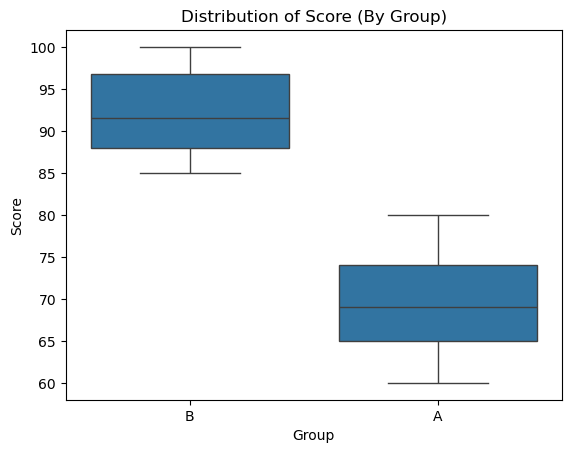

In [14]:
# 箱ひげ図の作成: グループごとのscoreのばらつきと外れ値を確認
sns.boxplot(x='group', y='score', data=df)
plt.title("Distribution of Score (By Group)")
plt.xlabel("Group")
plt.ylabel("Score")
plt.show()

In [15]:
# group Aとgroup Bのscoreデータを抽出
group_A = df[df['group'] == 'A']['score']
group_B = df[df['group'] == 'B']['score']

# 独立2群のt検定を実行
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f"t統計量: {t_stat:.3f}")
print(f"p値: {p_value:.3f}")

if p_value < 0.05:
    print("統計的に有意な差があると判断できます。")
else:
    print("統計的に有意な差は認められません。")

t統計量: -20.947
p値: 0.000
統計的に有意な差があると判断できます。
